In [5]:
# Random Walk in 2D dimension for number of steps passed 
# Simulates for number of simulations specified
"""
Created on Tue Sep 15 23:41:16 2020
@author: Pinak Chakraborty
"""
def randomWalk2D(numStep, numSimulation) :
    randomPath = []
    originStart = (0,0)
    stepChoices = [(0,1), (0,-1), (1, 0), (-1, 0)] 
    
    #run the loop below for all simulations
    for sim in range(1, numSimulation + 1):  
        #set up list for random steps taken with origin as the starting point
        z = []
        z.append(originStart)
       #this step randomly selects z from {(0,1), (0,-1), (1,0), (-1,0)} with equal probability
        for i in range(numStep):
            z.append(random.choice(stepChoices))
        #cumulative sum from origin to progressivley adding z to determine next point on the path
        rPath = np.cumsum(z,axis=0)
        randomPath.append(rPath) #store it a list to be returned

    return(randomPath) #returns a list of list for all simluation for the steps walked

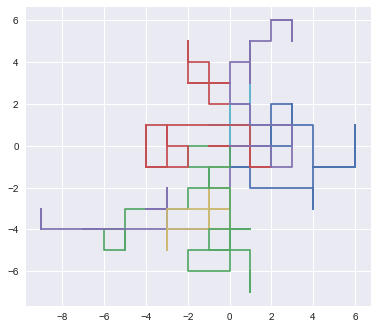

In [5]:
#runs numSim simulations for numStep 
numStep=25
numSim=10
randomPath = randomWalk2D(numStep,numSim)

# let's see how random paths looks like
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
plt.style.use('seaborn')

for i in range(len(randomPath)) :
    x_pos, y_pos = np.transpose(randomPath[i])[0:2]
    plt.plot(x_pos,y_pos)
    plt.grid()

ax.set_aspect('equal', adjustable='box')

In [7]:
#this is the first big simulation
# run 10,000 simulations for random path with step 1,000
numStep=1000
numSim=10000
randomPath = randomWalk2D(numStep,numSim)

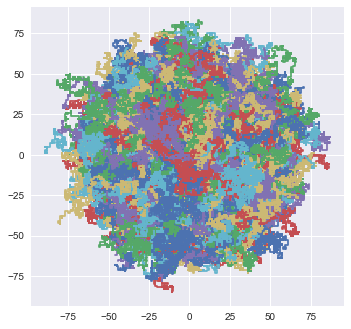

In [8]:
#let's see how random paths look like
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
plt.style.use('seaborn')

for i in range(len(randomPath)) :
    x_pos, y_pos = np.transpose(randomPath[i])[0:2]
    plt.plot(x_pos,y_pos)
    
ax.set_aspect('equal', adjustable='box')

In [9]:
euclDist = np.zeros(numSim)
for i in range(len(randomPath)):
    euclDist[i] = round(np.sqrt(randomPath[i][numStep -1][0]**2 + randomPath[i][numStep -1][1]**2),2)
print("distance mean :", euclDist.mean(), "distance std : ", euclDist.std())

distance mean : 28.214286000000005 distance std :  14.616963804094336


In [10]:
numStep=1000
numSim=20000
randomPath = randomWalk2D(numStep,numSim)

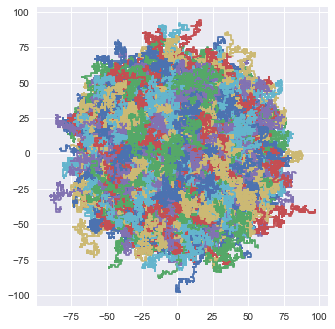

In [11]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
plt.style.use('seaborn')

for i in range(len(randomPath)) :
    x_pos, y_pos = np.transpose(randomPath[i])[0:2]
    plt.plot(x_pos,y_pos)
    
ax.set_aspect('equal', adjustable='box')

In [12]:
euclDist = np.zeros(numSim)
for i in range(len(randomPath)):
    euclDist[i] = round(np.sqrt(randomPath[i][numStep -1][0]**2 + randomPath[i][numStep -1][1]**2),2)
print("distance mean :", euclDist.mean(), "distance std : ", euclDist.std())

distance mean : 28.2017315 distance std :  14.731578086440969


In [35]:
# This is a simulation to examine relation between average distance travelled
# and number of steps taken in a random walk.
# This simulation is run 20000 times for every step to 1000.
# Then avearge distance of every step (from 20000 simulation) is calculated
# and plotted against the number of steps
"""
Created on Wed Sep 16 00:45:34 2020
@author: Pinak Chakraborty
"""
allSimulatedStepDist = {}
numSim = 20000
mxnumStep =1000

#for every step from 10 to max step generate random path for no of simulation
for numStep in range(mxnumStep + 1) :  
    randomPathAll = randomWalk2D(numStep,numSim)
    euclDist = np.zeros(numSim)
    
    for i in range(len(randomPathAll)): #calculate Euclidean distance for all random walk 
        euclDist[i] = np.sqrt(randomPathAll[i][numStep -1][0]**2 + randomPathAll[i][numStep -1][1]**2)
    
    allSimulatedStepDist ["step_" + str(numStep)] = euclDist  #store in a dictionary for easy calculation

print("All simulation ended")  #this takes time to complete - 50K simulation runs for all points specified

All simulation ended


In [276]:
'''# written to C:\Users\PinakCborty
import pickle
filename = 'allSimulatedStepDist_large'
infile = open(filename,'rb')
allSimulatedStepDist = pickle.load(infile)
infile.close()'''

In [278]:
# calculate average distance travelled in every step from all simulations
import pandas as pd
simulation=pd.DataFrame(allSimulatedStepDist)

In [280]:
mu = np.zeros(mxnumStep)
for i in range(mxnumStep) :
    mu[i] = simulation["step_" + str(i)].mean()

In [67]:
'''# written to C:\Users\PinakCborty
#import pickle
filename = 'allSimulatedStepDist_large'
outfile = open(filename,'wb')
pickle.dump(allSimulatedStepDist, outfile)
outfile.close()'''

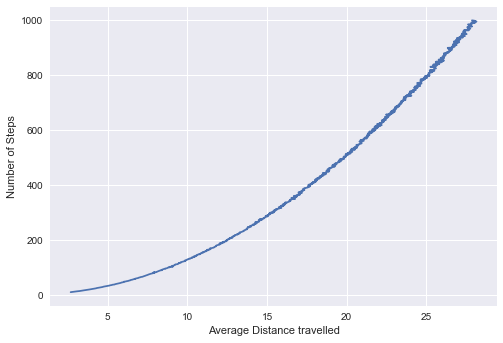

In [283]:
y_step = [i for i in range(mxnumStep)][10:]
plt.xlabel("Average Distance travelled")
plt.ylabel("Number of Steps")
plt.style.use('seaborn')
plt.plot(mu[10:], y_step)

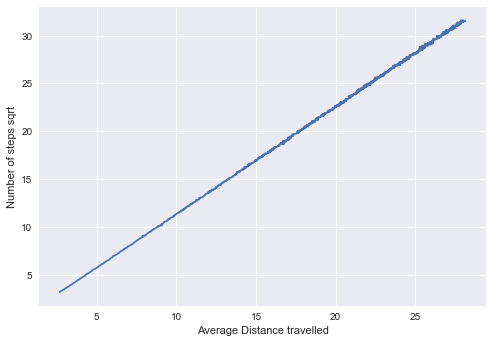

In [284]:
y_step_sqrt = [np.sqrt(i) for i in y_step]
plt.ylabel("Number of steps sqrt")
plt.xlabel("Average Distance travelled")
plt.plot(mu[10:], y_step_sqrt)

In [285]:
import sympy as sym
model = np.poly1d(np.polyfit(mu[10:], y_step, 2))
var=sym.Symbol('average')
print( "no_of_step = ", sym.expand(model(var)))

no_of_step =  1.26721692890032*average**2 + 0.151507321772169*average + 0.116175545738188


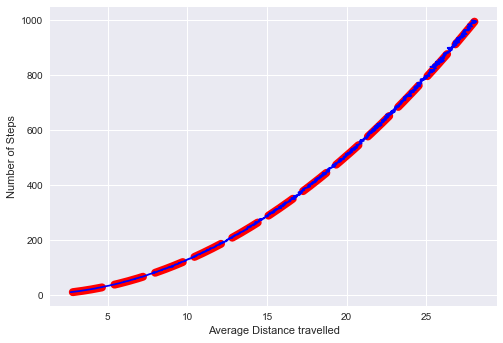

In [293]:
y_step = [i for i in range(mxnumStep)][10:]
mu_cal = [np.sqrt(i/1.267) for i in y_step]

plt.xlabel("Average Distance travelled")
plt.ylabel("Number of Steps")
plt.style.use('seaborn')
plt.plot(mu_cal, y_step,'r--', linewidth=8, dash_capstyle='round') #this is the predicted mu
plt.plot(mu[10:], y_step,'b') # this is the actual mu from simulation

In [297]:
from sklearn.metrics import mean_squared_error
mean_squared_error(mu[10:], mu_cal)

0.009679952261692512

In [ ]:
simulatedStepDistRecur = {}
mxnumStep =1000
numSim = 5000

#for every step till max step generate random path for no of simulation
for numStep in np.arange(100,5000,100) :  
    randomPathRecur = randomWalk2D(numStep,numSim)
      
    simulatedStepDistRecur ["step_" + str(numStep)] = randomPathRecur  #store in a dictionary for easy calculation

print("All simulation ended")  #this takes time to complete - 20K simulation runs for all points specified

In [ ]:
recurrentNo = []
for step in np.arange (100,5000,500):
    recurrent = 0
    for sim in simulatedStepDistRecur ["step_" + str(step)]:
        for point in sim[1:] : #first point to be ignored
            if point[0] == 0 and point [1] == 0 :
                recurrent = recurrent + 1
                break
    recurrentNo.append(recurrent)
print("all done")

In [ ]:
steps = [i for i in np.arange(100,5000,500)]
recurProb = [round((i/numSim)*100,2) for i in recurrentNo]

In [ ]:
plt.style.use('seaborn')
plt.plot(steps, recurProb)
plt.grid(True)
plt.xlabel("No of Steps")
plt.ylabel("Probability of recurrence")
plt.xticks(np.arange(100,5000,500)) 
plt.yticks(np.arange(55,75, 2))